<center><h1>Inteligencia Artificial</header1></center>

Presentado por: <br>
- Anthony Mauricio Goyes Díaz  <br>
- Bryan Alfredo Solórzano Montero <br>

Fecha: 13/08/2022

# Importación de librerias necesarias

In [276]:
'''Se importa la libreria cv2'''
import cv2
'''Se importa la libreria numpy'''
import numpy as np
'''Se importa la libreria os'''
import os
'''Se establece el nivel de codificación'''
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
'''Se importa la libreria pandas'''
import pandas as pd
'''Se importa la libreria pyplot'''
import matplotlib.pyplot as plt
'''Se importan el módulo ImageDataGenerator'''
from keras.preprocessing.image import ImageDataGenerator
'''Se importan los módulos array_to_img, img_to_array, load_img'''
from tensorflow.keras.utils import img_to_array, array_to_img, img_to_array, load_img
'''Se importa el módulo Image'''
from  PIL  import Image
'''Se importa la libreria h5py'''
import h5py
'''Se importa el módulo remove'''
from rembg import remove
'''Se importa el método io del módulo skimage'''
from skimage import io
'''Se importa el módulo random'''
import random
'''Se importa el módulo glob'''
import glob
from tqdm import tqdm 

In [231]:
class colorear:
    '''Generación de código ascii para colorear texto'''
    OK = '\033[1;92m' #Verde-negrita
    ADVERTENCIA = '\033[1;93m' #Amarillo-negrita
    ERROR = '\033[1;91m' #Rojo-negrita
    REINICIAR = '\033[1;0m' #Resetar color-negrita

## Cargar el Dataset

In [255]:
'''Se establece la ruta general de espacio de trabajo'''
os.chdir('C:/Users/Personal/IA/ProyectoU3/')

In [230]:
'''Se establece la ruta de las imágenes'''
ruta_imagenes = "./recursos/clases"
'''Se muestra los directorios (clases) del dataset'''
nombre_clases = os.listdir(ruta_imagenes)
'''Se ordenan en orden alfabético (AZ - az)'''
nombre_clases.sort()
'''Se muestran las clases del dataset'''
print('Las clases del dataset son: \n' + str(nombre_clases))

Las clases del dataset son: 
['Anthony Goyes', 'Ariel Chabla', 'Bryan Solorzano', 'Davila Raymond', 'Fernando Masache', 'Genesis Heredia', 'Hector Cedenio', 'Jhon Zambrano', 'Joan Cevallos', 'Johana Salazar', 'Jordan Espinosa', 'Jorge Borrero', 'Jose Ruiz', 'Kevin Paute', 'Leonardo Borja', 'LucioCarlos', 'Lucy Mosquera', 'Luis Olalla', 'Maria Jose Parraga', 'Melany Lopez', 'Mercy Arrobo', 'Nataly Acosta', 'Selena Enriquez', 'Selena Rivas', 'Solano Wilmer', 'Steven Barragan']


## Descripción de la fuente del Dataset

La colección de datos está conformada por cinco clases que representan a cada estudiante perteneciente a la Universidad de las Fuerzas Armadas ESPE sede Santo Domingo de la materia de Inteligencia Artificial. Cada clase tiene un total de tres imágenes del rostro del estudiante, siendo cada una para la perspectiva de frente, perfil izquierdo y derecho. Por lo tanto, se tiene un total de 15 imágenes en total. Sin embargo estas imágenes tienen dimensiones y extensiones variadas por lo que será necesario realizar una limpieza a los datos y preprocesarlos.   

## Explique el problema a resolver. 
Se pretende reconocer si una persona pertenece a la clase de Inteligencia artificial de las Fuerzas Armadas ESPE sede Santo Domingo para lo cuál se debe recolectar imágenes del rostro de cada estudiante desde diferentes perspectivas y generar un modelo predictivo. Debido a que la clase de Inteligencia Artificial tiene varios estudiantes (26 estudiates/clases) el modelo a generar es clasificatorio multi-clase y será el modelo predictivo de Redes Neuronales Convoolucionales, es decir, no etiquetado. Lo que se espera predecir es el nombre del estudiante (etiqueta) a la que pertecena la imagen de entrada. El modelo podría tener una aplicación en la universidad de las Fuerzas Armadas ESPE como sistema automático para la asistencia en la clase.

Realice una descripción de los datos con:

>- Número de instancias en total.

In [232]:
instancias = 0
'''Se genera un bucle para recorrer cada etiqueta de las clases'''
for nombre_clase in nombre_clases:
    '''Se almacena la ruta actual de cada clase por ciclo'''
    ruta_actual = ruta_imagenes + "/" + nombre_clase
    '''Se obtiene una lista de los elementos por clase'''
    elementos = os.listdir(ruta_actual) 
    '''Se genera un nuevo ciclo que recorre cada elemento por clase'''
    for elemento in elementos:
        '''Se contabiliza el total de instancias'''
        instancias+=1
print(f'Existen un total de {colorear.OK} ' + str(len(nombre_clases)) + f' clases {colorear.REINICIAR}')
print(f'Y un total de {colorear.OK}' + str(instancias) + f' fotos {colorear.REINICIAR}')

Existen un total de  26 clases 
Y un total de 268 fotos 


In [233]:
# fotos por clases
cantidad = 0
for clases in os.listdir('./recursos/clases/'):
    for contador in os.listdir('./recursos/clases/' + clases):
        cantidad+=1
    print('Para la clase ',bcolors.OK + clases + bcolors.RESET,
          ' se tiene un total de ',bcolors.OK + str(cantidad) + bcolors.RESET,' fotos')     
    cantidad = 0

Para la clase  Anthony Goyes  se tiene un total de  10  fotos
Para la clase  Ariel Chabla  se tiene un total de  8  fotos
Para la clase  Bryan Solorzano  se tiene un total de  12  fotos
Para la clase  Davila Raymond  se tiene un total de  9  fotos
Para la clase  Fernando Masache  se tiene un total de  10  fotos
Para la clase  Genesis Heredia  se tiene un total de  13  fotos
Para la clase  Hector Cedenio  se tiene un total de  10  fotos
Para la clase  Jhon Zambrano  se tiene un total de  16  fotos
Para la clase  Joan Cevallos  se tiene un total de  9  fotos
Para la clase  Johana Salazar  se tiene un total de  8  fotos
Para la clase  Jordan Espinosa  se tiene un total de  8  fotos
Para la clase  Jorge Borrero  se tiene un total de  3  fotos
Para la clase  Jose Ruiz  se tiene un total de  10  fotos
Para la clase  Kevin Paute  se tiene un total de  10  fotos
Para la clase  Leonardo Borja  se tiene un total de  13  fotos
Para la clase  LucioCarlos  se tiene un total de  13  fotos
Para la cl

In [234]:
def cargarImagenes(ruta_imagenes):
    """Permite imprimir randómicamente una imagen por cada clase con título y sus dimensiones.

    Argumentos:
        ruta_imagenes (str): Una cadena de texto que identifica el.

    Returna:
                    No retorna nada
    """
    '''Arreglo vacío que almacenará las fotos'''
    imagen = []
    '''Se genera un bucle para recorrer cada etiqueta de las clases'''
    for nombre_clase in nombre_clases:
        '''Se almacena la ruta actual de cada clase por ciclo'''
        ruta_actual = ruta_imagenes + "/" + nombre_clase
        '''Se obtiene una lista de los elementos por clase'''
        elementos = os.listdir(ruta_actual) 
        '''Se generar un número aleatorio encargado de imprimir una imagen por clase'''
        ran = random.randint(0, len(elementos) - 1)
        '''Se agrega al arreglo vacío un elemento aleatorio represtado como imagen'''
        imagen.append(io.imread(ruta_imagenes + "/" + nombre_clase +'/'+ elementos[ran])/255.0) 

    '''Se establece las dimensiones de contendor del gráfico'''  
    plt.figure(figsize=(19,15))
    '''Se genera un ciclo que recorrerá cada elemento del arreglo de fotos'''
    for iterador in range(len(nombre_clases)):
        '''Se establece la distribución de cada elemento en el contenedor gráfico
        donde se genera de manera dinámica en relación al número de elementos'''
        ax = plt.subplot(round(len(nombre_clases)/5)+1,5, iterador+1)
        '''Se muestra la imagen actual del ciclo'''
        plt.imshow(imagen[iterador])
        '''Se establece un título representativo de la imaegen y se menciona su dimensión'''
        plt.title(nombre_clases[iterador] + ' ' + str(imagen[iterador].shape))
        plt.axis('off')

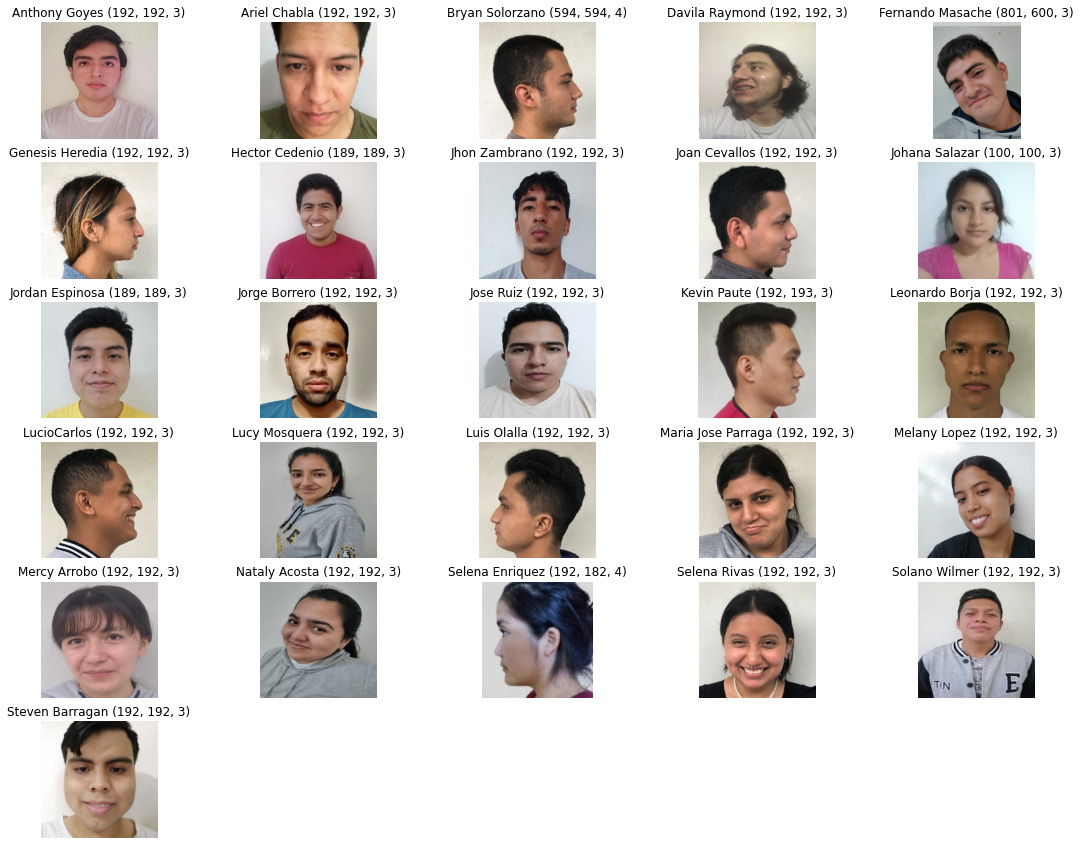

In [235]:
cargarImagenes(ruta_imagenes)

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [236]:
def crearDirecotrio(ruta):
    """Permite crear los directorios que se usarán para almacenar los datos transformados para cada etapa.

    Argumentos:
        ruta (str): Una cadena de texto que recibe la ruta padre donde se crearán los directorios.
    Retorna:
        No retorna nada
    """
    '''Pasos para almacenar los nuevos datos después de usar la técnica de
    aumentos de datos'''
    '''Se crea un nuevo directorio con la ruta anterior'''
    os.mkdir(ruta)
    '''Se establece un ciclo que creará el nombre y directorio de las carpetas
    que contendrá las imágenes de cada una de las clases'''
    for clase in nombre_clases:
        '''Se asigna la ruta de la clase a una variable'''
        subdirectorio = ruta+"/"+clase
        '''Se crea un nuevo directorio con la ruta anterior'''
        os.mkdir(subdirectorio)

In [237]:
ruta = './Estudiantes_datos_aumentados'
crearDirecotrio(ruta)
ruta = './Estudiantes_datos_ruidoEliminado'
crearDirecotrio(ruta)
ruta = './Estudiantes_datos_fondoEliminadoSinNLM'
crearDirecotrio(ruta)
ruta = './Estudiantes_datos_fondoEliminadoNLM'
crearDirecotrio(ruta)

In [238]:
'''Se genera un bucle para recorrer cada etiqueta de las clases'''
for nombre_clase in nombre_clases:
    '''Se almacena la ruta actual de cada clase por ciclo'''
    ruta_actual = ruta_imagenes + "/" + nombre_clase
    '''Se obtiene una lista de los elementos por clase'''
    elementos = os.listdir(ruta_actual) 
    '''Se genera un nuevo ciclo que recorre cada elemento por clase'''
    for elemento in elementos:
        '''Se almacena la ruta de la imagen en una variable'''
        imagen = ruta_actual+'/'+elemento
        '''Se lee la ruta y se almacena la imagen leída en una variable'''
        imagen = cv2.imread(imagen)
        '''Se ajustan las dimensiones de la imagen'''
        imagen = cv2.resize(imagen, (100,100))
        '''Se almacena el prefijo del nombre de la imagen'''
        elemento = elemento[:elemento.find(".")]
        '''Se imprime un mensaje del proceso'''
        print("Copiando imagen - {} en Estudiantes_datos_aumentados/{}".format(elemento+'.jpg', nombre_clase))
        '''Se establece la ruta destino de ese elemento'''
        ruta_destino = ("C:/Users/Personal/IA/ProyectoU3/Estudiantes_datos_Aumentados/" + nombre_clase + '/') 
        '''Se copia el elemento del origen al destino cambiando el formato a jpg'''
        cv2.imwrite(os.path.join(ruta_destino, elemento+'.jpg')    , imagen)

Copiando imagen - L00393010_1.jpg en Estudiantes_datos_aumentados/Anthony Goyes
Copiando imagen - L00393010_10.jpg en Estudiantes_datos_aumentados/Anthony Goyes
Copiando imagen - L00393010_2.jpg en Estudiantes_datos_aumentados/Anthony Goyes
Copiando imagen - L00393010_3.jpg en Estudiantes_datos_aumentados/Anthony Goyes
Copiando imagen - L00393010_4.jpg en Estudiantes_datos_aumentados/Anthony Goyes
Copiando imagen - L00393010_5.jpg en Estudiantes_datos_aumentados/Anthony Goyes
Copiando imagen - L00393010_6.jpg en Estudiantes_datos_aumentados/Anthony Goyes
Copiando imagen - L00393010_7.jpg en Estudiantes_datos_aumentados/Anthony Goyes
Copiando imagen - L00393010_8.jpg en Estudiantes_datos_aumentados/Anthony Goyes
Copiando imagen - L00393010_9.jpg en Estudiantes_datos_aumentados/Anthony Goyes
Copiando imagen - L00376418_1.jpg en Estudiantes_datos_aumentados/Ariel Chabla
Copiando imagen - L00376418_2.jpg en Estudiantes_datos_aumentados/Ariel Chabla
Copiando imagen - L00376418_3.jpg en Estu

Copiando imagen - L00380416_5.jpg en Estudiantes_datos_aumentados/Johana Salazar
Copiando imagen - L00080128_1 Frente.jpg en Estudiantes_datos_aumentados/Jordan Espinosa
Copiando imagen - L00080128_2 Derecho.jpg en Estudiantes_datos_aumentados/Jordan Espinosa
Copiando imagen - L00080128_3 Izquierda.jpg en Estudiantes_datos_aumentados/Jordan Espinosa
Copiando imagen - L00080128_4.jpg en Estudiantes_datos_aumentados/Jordan Espinosa
Copiando imagen - L00080128_5.jpg en Estudiantes_datos_aumentados/Jordan Espinosa
Copiando imagen - L00080128_6.jpg en Estudiantes_datos_aumentados/Jordan Espinosa
Copiando imagen - L00080128_7.jpg en Estudiantes_datos_aumentados/Jordan Espinosa
Copiando imagen - L00080128_8.jpg en Estudiantes_datos_aumentados/Jordan Espinosa
Copiando imagen - L00379412_1.jpg en Estudiantes_datos_aumentados/Jorge Borrero
Copiando imagen - L00379412_2.jpg en Estudiantes_datos_aumentados/Jorge Borrero
Copiando imagen - L00379412_3.jpg en Estudiantes_datos_aumentados/Jorge Borrer

Copiando imagen - L00380424_3.jpg en Estudiantes_datos_aumentados/Nataly Acosta
Copiando imagen - L00380424_4.jpg en Estudiantes_datos_aumentados/Nataly Acosta
Copiando imagen - L00380424_5.jpg en Estudiantes_datos_aumentados/Nataly Acosta
Copiando imagen - L00380424_6.jpg en Estudiantes_datos_aumentados/Nataly Acosta
Copiando imagen - L00380424_7.jpg en Estudiantes_datos_aumentados/Nataly Acosta
Copiando imagen - L00380424_8.jpg en Estudiantes_datos_aumentados/Nataly Acosta
Copiando imagen - L000376481_1.jpg en Estudiantes_datos_aumentados/Selena Enriquez
Copiando imagen - L000376481_2.jpg en Estudiantes_datos_aumentados/Selena Enriquez
Copiando imagen - L000376481_3.jpg en Estudiantes_datos_aumentados/Selena Enriquez
Copiando imagen - L000376481_4.jpg en Estudiantes_datos_aumentados/Selena Enriquez
Copiando imagen - L000376481_5.jpg en Estudiantes_datos_aumentados/Selena Enriquez
Copiando imagen - L00376481_1.jpg en Estudiantes_datos_aumentados/Selena Enriquez
Copiando imagen - L0037

# Aumento de datos (Data augmentation)

In [239]:
'''Se crea un elemento para generar imagenes según sus hiperparámetros'''
generacionDatos = ImageDataGenerator(
    rotation_range=30,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest"
)

## Aumento de datos para todas la clases 

In [260]:
'''Se redirecciona con una ruta dinámica para el sistema'''
os.chdir(r'C:/Users/Personal/IA/ProyectoU3/Estudiantes_datos_aumentados')
for clases in os.listdir():
    '''Se genera una ciclo que recorre cada elemento de la clase "GoyesAnthony"'''      
    for elemento in tqdm(os.listdir(clases), desc="Aumentando la cantidad de imágenes para la clase "
                         + clases + "..."):
        '''Se almacena la imagen de la ruta'''
        imagen = load_img(f"{os.getcwd()+ '/' + clases + '/' + elemento}")
        '''Se almacena un array Numpy'''
        elemento_iterado = img_to_array(imagen)
        elemento_iterado = cv2.resize(elemento_iterado,(100,100))
        '''Se aumenta una dimensión por ciclo que hará referencia a cada elemento'''  
        elemento_iterado = elemento_iterado.reshape((1,) + elemento_iterado.shape)
        '''Se inicializa un iterador'''
        iterador = 0
        '''Se genera un ciclo que corrererá cada lote de la transformación con sus
        hiperparámetros'''
        for lote in generacionDatos.flow(elemento_iterado, batch_size=1,
                save_to_dir="./"+str(clases), 
                save_prefix= clases, 
                save_format='jpg'):
            '''Se aumenta en una unidad en el iterador'''
            iterador += 1
            '''Se crea 10 imágenes de cada imagen'''
            if iterador == 10: 
                break  

Aumentando la cantidad de imágenes para la clase Anthony Goyes...: 100%|███████████████| 10/10 [00:01<00:00,  9.76it/s]
Aumentando la cantidad de imágenes para la clase Ariel Chabla...: 100%|██████████████████| 8/8 [00:00<00:00, 10.00it/s]
Aumentando la cantidad de imágenes para la clase Bryan Solorzano...: 100%|███████████████| 9/9 [00:00<00:00, 10.10it/s]
Aumentando la cantidad de imágenes para la clase Davila Raymond...: 100%|████████████████| 9/9 [00:00<00:00, 14.89it/s]
Aumentando la cantidad de imágenes para la clase Fernando Masache...: 100%|████████████| 10/10 [00:00<00:00, 10.76it/s]
Aumentando la cantidad de imágenes para la clase Genesis Heredia...: 100%|█████████████| 10/10 [00:00<00:00, 13.97it/s]
Aumentando la cantidad de imágenes para la clase Hector Cedenio...: 100%|██████████████| 10/10 [00:01<00:00,  8.17it/s]
Aumentando la cantidad de imágenes para la clase Jhon Zambrano...: 100%|███████████████| 13/13 [00:01<00:00,  9.14it/s]
Aumentando la cantidad de imágenes para 

In [261]:
'''Se redirecciona con una ruta dinámica para el sistema'''
os.chdir(r'C:/Users/Personal/IA/ProyectoU3/')
instancias = 0
'''Se genera un bucle para recorrer cada etiqueta de las clases'''
for nombre_clase in nombre_clases:
    '''Se almacena la ruta actual de cada clase por ciclo'''
    ruta_actual = './Estudiantes_datos_aumentados' + "/" + nombre_clase
    '''Se obtiene una lista de los elementos por clase'''
    elementos = os.listdir(ruta_actual) 
    '''Se genera un nuevo ciclo que recorre cada elemento por clase'''
    for elemento in elementos:
        '''Se contabiliza el total de instancias'''
        instancias+=1
print(f'Existen un total de {colorear.OK} ' + str(len(nombre_clases)) + f' clases {colorear.REINICIAR}')
print(f'Y un total de {colorear.OK}' + str(instancias) + f' fotos {colorear.REINICIAR}')

Existen un total de  26 clases 
Y un total de 2673 fotos 


In [266]:
'''Se establece la ruta general de espacio de trabajo'''
os.chdir('C:/Users/Personal/IA/ProyectoU3/')
# fotos por clases
cantidad = 0
for clases in os.listdir('./Estudiantes_datos_aumentados/'):
    for contador in os.listdir('./Estudiantes_datos_aumentados/' + clases):
        cantidad+=1
    print('Para la clase ',bcolors.OK + clases + bcolors.RESET,
          ' se tiene un total de ',bcolors.OK + str(cantidad) + bcolors.RESET,' fotos')     
    cantidad = 0

Para la clase  Anthony Goyes  se tiene un total de  110  fotos
Para la clase  Ariel Chabla  se tiene un total de  88  fotos
Para la clase  Bryan Solorzano  se tiene un total de  98  fotos
Para la clase  Davila Raymond  se tiene un total de  98  fotos
Para la clase  Fernando Masache  se tiene un total de  110  fotos
Para la clase  Genesis Heredia  se tiene un total de  108  fotos
Para la clase  Hector Cedenio  se tiene un total de  109  fotos
Para la clase  Jhon Zambrano  se tiene un total de  143  fotos
Para la clase  Joan Cevallos  se tiene un total de  99  fotos
Para la clase  Johana Salazar  se tiene un total de  87  fotos
Para la clase  Jordan Espinosa  se tiene un total de  88  fotos
Para la clase  Jorge Borrero  se tiene un total de  33  fotos
Para la clase  Jose Ruiz  se tiene un total de  110  fotos
Para la clase  Kevin Paute  se tiene un total de  108  fotos
Para la clase  Leonardo Borja  se tiene un total de  110  fotos
Para la clase  LucioCarlos  se tiene un total de  110  f

## Filtro NLM para la eliminación de ruido de las imágenes

In [262]:
'''Se establece la ruta que contiene a las clases del dataset a usar'''
ruta_imagenes = "./Estudiantes_datos_Aumentados"
'''Se almacena los directorios de cada clase'''
nombre_clases = os.listdir(ruta_imagenes)

In [263]:
'''Se genera un bucle para recorrer cada etiqueta de las clases'''
for nombre_clase in nombre_clases:     
    '''Se almacena la ruta actual de cada clase por ciclo'''
    ruta_actual = ruta_imagenes + "/" + nombre_clase
    '''Se almacenan las etiquetas de las clases'''
    etiqueta_actual = nombre_clase
    '''Se genera un iterador'''
    iterador = 1
    '''Se recorre cada imagen por clase sin importar su nombre o extensión'''
    for file in glob.glob(ruta_actual + "/*"):
        '''Se imprime el proceso'''
        print("Procesando imagen - {} en {}".format(iterador, etiqueta_actual))
        '''Se leen las rutas de las imágenes'''
        imagen = cv2.imread(file)
        '''Se establece la denotación de imágenes'''
        dst = cv2.fastNlMeansDenoisingColored(imagen,None,10,10,7,21)
        '''Se divide por capa de color'''
        b,g,r = cv2.split(dst)
        '''Se unen las capas seperadas en orden (r,g,b)'''
        rgb_dst = cv2.merge([r,g,b])
        '''Se guardan las imagenes'''
        ruta_guardado = './Estudiantes_datos_ruidoEliminado/'+ etiqueta_actual
        '''Se genera cada imagen según la ruta de guardado'''
        cv2.imwrite(os.path.join(ruta_guardado , etiqueta_actual + '_' + str(iterador) + '.jpg'),
                    cv2.cvtColor(rgb_dst,cv2.COLOR_RGB2BGR))
        
        '''Se muestra la actualización del bucle'''
        iterador += 1

Procesando imagen - 1 en Anthony Goyes
Procesando imagen - 2 en Anthony Goyes
Procesando imagen - 3 en Anthony Goyes
Procesando imagen - 4 en Anthony Goyes
Procesando imagen - 5 en Anthony Goyes
Procesando imagen - 6 en Anthony Goyes
Procesando imagen - 7 en Anthony Goyes
Procesando imagen - 8 en Anthony Goyes
Procesando imagen - 9 en Anthony Goyes
Procesando imagen - 10 en Anthony Goyes
Procesando imagen - 11 en Anthony Goyes
Procesando imagen - 12 en Anthony Goyes
Procesando imagen - 13 en Anthony Goyes
Procesando imagen - 14 en Anthony Goyes
Procesando imagen - 15 en Anthony Goyes
Procesando imagen - 16 en Anthony Goyes
Procesando imagen - 17 en Anthony Goyes
Procesando imagen - 18 en Anthony Goyes
Procesando imagen - 19 en Anthony Goyes
Procesando imagen - 20 en Anthony Goyes
Procesando imagen - 21 en Anthony Goyes
Procesando imagen - 22 en Anthony Goyes
Procesando imagen - 23 en Anthony Goyes
Procesando imagen - 24 en Anthony Goyes
Procesando imagen - 25 en Anthony Goyes
Procesand

Procesando imagen - 10 en Bryan Solorzano
Procesando imagen - 11 en Bryan Solorzano
Procesando imagen - 12 en Bryan Solorzano
Procesando imagen - 13 en Bryan Solorzano
Procesando imagen - 14 en Bryan Solorzano
Procesando imagen - 15 en Bryan Solorzano
Procesando imagen - 16 en Bryan Solorzano
Procesando imagen - 17 en Bryan Solorzano
Procesando imagen - 18 en Bryan Solorzano
Procesando imagen - 19 en Bryan Solorzano
Procesando imagen - 20 en Bryan Solorzano
Procesando imagen - 21 en Bryan Solorzano
Procesando imagen - 22 en Bryan Solorzano
Procesando imagen - 23 en Bryan Solorzano
Procesando imagen - 24 en Bryan Solorzano
Procesando imagen - 25 en Bryan Solorzano
Procesando imagen - 26 en Bryan Solorzano
Procesando imagen - 27 en Bryan Solorzano
Procesando imagen - 28 en Bryan Solorzano
Procesando imagen - 29 en Bryan Solorzano
Procesando imagen - 30 en Bryan Solorzano
Procesando imagen - 31 en Bryan Solorzano
Procesando imagen - 32 en Bryan Solorzano
Procesando imagen - 33 en Bryan So

Procesando imagen - 13 en Fernando Masache
Procesando imagen - 14 en Fernando Masache
Procesando imagen - 15 en Fernando Masache
Procesando imagen - 16 en Fernando Masache
Procesando imagen - 17 en Fernando Masache
Procesando imagen - 18 en Fernando Masache
Procesando imagen - 19 en Fernando Masache
Procesando imagen - 20 en Fernando Masache
Procesando imagen - 21 en Fernando Masache
Procesando imagen - 22 en Fernando Masache
Procesando imagen - 23 en Fernando Masache
Procesando imagen - 24 en Fernando Masache
Procesando imagen - 25 en Fernando Masache
Procesando imagen - 26 en Fernando Masache
Procesando imagen - 27 en Fernando Masache
Procesando imagen - 28 en Fernando Masache
Procesando imagen - 29 en Fernando Masache
Procesando imagen - 30 en Fernando Masache
Procesando imagen - 31 en Fernando Masache
Procesando imagen - 32 en Fernando Masache
Procesando imagen - 33 en Fernando Masache
Procesando imagen - 34 en Fernando Masache
Procesando imagen - 35 en Fernando Masache
Procesando 

Procesando imagen - 96 en Genesis Heredia
Procesando imagen - 97 en Genesis Heredia
Procesando imagen - 98 en Genesis Heredia
Procesando imagen - 99 en Genesis Heredia
Procesando imagen - 100 en Genesis Heredia
Procesando imagen - 101 en Genesis Heredia
Procesando imagen - 102 en Genesis Heredia
Procesando imagen - 103 en Genesis Heredia
Procesando imagen - 104 en Genesis Heredia
Procesando imagen - 105 en Genesis Heredia
Procesando imagen - 106 en Genesis Heredia
Procesando imagen - 107 en Genesis Heredia
Procesando imagen - 108 en Genesis Heredia
Procesando imagen - 1 en Hector Cedenio
Procesando imagen - 2 en Hector Cedenio
Procesando imagen - 3 en Hector Cedenio
Procesando imagen - 4 en Hector Cedenio
Procesando imagen - 5 en Hector Cedenio
Procesando imagen - 6 en Hector Cedenio
Procesando imagen - 7 en Hector Cedenio
Procesando imagen - 8 en Hector Cedenio
Procesando imagen - 9 en Hector Cedenio
Procesando imagen - 10 en Hector Cedenio
Procesando imagen - 11 en Hector Cedenio
Pro

Procesando imagen - 82 en Jhon Zambrano
Procesando imagen - 83 en Jhon Zambrano
Procesando imagen - 84 en Jhon Zambrano
Procesando imagen - 85 en Jhon Zambrano
Procesando imagen - 86 en Jhon Zambrano
Procesando imagen - 87 en Jhon Zambrano
Procesando imagen - 88 en Jhon Zambrano
Procesando imagen - 89 en Jhon Zambrano
Procesando imagen - 90 en Jhon Zambrano
Procesando imagen - 91 en Jhon Zambrano
Procesando imagen - 92 en Jhon Zambrano
Procesando imagen - 93 en Jhon Zambrano
Procesando imagen - 94 en Jhon Zambrano
Procesando imagen - 95 en Jhon Zambrano
Procesando imagen - 96 en Jhon Zambrano
Procesando imagen - 97 en Jhon Zambrano
Procesando imagen - 98 en Jhon Zambrano
Procesando imagen - 99 en Jhon Zambrano
Procesando imagen - 100 en Jhon Zambrano
Procesando imagen - 101 en Jhon Zambrano
Procesando imagen - 102 en Jhon Zambrano
Procesando imagen - 103 en Jhon Zambrano
Procesando imagen - 104 en Jhon Zambrano
Procesando imagen - 105 en Jhon Zambrano
Procesando imagen - 106 en Jhon Za

Procesando imagen - 45 en Johana Salazar
Procesando imagen - 46 en Johana Salazar
Procesando imagen - 47 en Johana Salazar
Procesando imagen - 48 en Johana Salazar
Procesando imagen - 49 en Johana Salazar
Procesando imagen - 50 en Johana Salazar
Procesando imagen - 51 en Johana Salazar
Procesando imagen - 52 en Johana Salazar
Procesando imagen - 53 en Johana Salazar
Procesando imagen - 54 en Johana Salazar
Procesando imagen - 55 en Johana Salazar
Procesando imagen - 56 en Johana Salazar
Procesando imagen - 57 en Johana Salazar
Procesando imagen - 58 en Johana Salazar
Procesando imagen - 59 en Johana Salazar
Procesando imagen - 60 en Johana Salazar
Procesando imagen - 61 en Johana Salazar
Procesando imagen - 62 en Johana Salazar
Procesando imagen - 63 en Johana Salazar
Procesando imagen - 64 en Johana Salazar
Procesando imagen - 65 en Johana Salazar
Procesando imagen - 66 en Johana Salazar
Procesando imagen - 67 en Johana Salazar
Procesando imagen - 68 en Johana Salazar
Procesando image

Procesando imagen - 42 en Jose Ruiz
Procesando imagen - 43 en Jose Ruiz
Procesando imagen - 44 en Jose Ruiz
Procesando imagen - 45 en Jose Ruiz
Procesando imagen - 46 en Jose Ruiz
Procesando imagen - 47 en Jose Ruiz
Procesando imagen - 48 en Jose Ruiz
Procesando imagen - 49 en Jose Ruiz
Procesando imagen - 50 en Jose Ruiz
Procesando imagen - 51 en Jose Ruiz
Procesando imagen - 52 en Jose Ruiz
Procesando imagen - 53 en Jose Ruiz
Procesando imagen - 54 en Jose Ruiz
Procesando imagen - 55 en Jose Ruiz
Procesando imagen - 56 en Jose Ruiz
Procesando imagen - 57 en Jose Ruiz
Procesando imagen - 58 en Jose Ruiz
Procesando imagen - 59 en Jose Ruiz
Procesando imagen - 60 en Jose Ruiz
Procesando imagen - 61 en Jose Ruiz
Procesando imagen - 62 en Jose Ruiz
Procesando imagen - 63 en Jose Ruiz
Procesando imagen - 64 en Jose Ruiz
Procesando imagen - 65 en Jose Ruiz
Procesando imagen - 66 en Jose Ruiz
Procesando imagen - 67 en Jose Ruiz
Procesando imagen - 68 en Jose Ruiz
Procesando imagen - 69 en Jo

Procesando imagen - 41 en Leonardo Borja
Procesando imagen - 42 en Leonardo Borja
Procesando imagen - 43 en Leonardo Borja
Procesando imagen - 44 en Leonardo Borja
Procesando imagen - 45 en Leonardo Borja
Procesando imagen - 46 en Leonardo Borja
Procesando imagen - 47 en Leonardo Borja
Procesando imagen - 48 en Leonardo Borja
Procesando imagen - 49 en Leonardo Borja
Procesando imagen - 50 en Leonardo Borja
Procesando imagen - 51 en Leonardo Borja
Procesando imagen - 52 en Leonardo Borja
Procesando imagen - 53 en Leonardo Borja
Procesando imagen - 54 en Leonardo Borja
Procesando imagen - 55 en Leonardo Borja
Procesando imagen - 56 en Leonardo Borja
Procesando imagen - 57 en Leonardo Borja
Procesando imagen - 58 en Leonardo Borja
Procesando imagen - 59 en Leonardo Borja
Procesando imagen - 60 en Leonardo Borja
Procesando imagen - 61 en Leonardo Borja
Procesando imagen - 62 en Leonardo Borja
Procesando imagen - 63 en Leonardo Borja
Procesando imagen - 64 en Leonardo Borja
Procesando image

Procesando imagen - 30 en Lucy Mosquera
Procesando imagen - 31 en Lucy Mosquera
Procesando imagen - 32 en Lucy Mosquera
Procesando imagen - 33 en Lucy Mosquera
Procesando imagen - 34 en Lucy Mosquera
Procesando imagen - 35 en Lucy Mosquera
Procesando imagen - 36 en Lucy Mosquera
Procesando imagen - 37 en Lucy Mosquera
Procesando imagen - 38 en Lucy Mosquera
Procesando imagen - 39 en Lucy Mosquera
Procesando imagen - 40 en Lucy Mosquera
Procesando imagen - 41 en Lucy Mosquera
Procesando imagen - 42 en Lucy Mosquera
Procesando imagen - 43 en Lucy Mosquera
Procesando imagen - 44 en Lucy Mosquera
Procesando imagen - 45 en Lucy Mosquera
Procesando imagen - 46 en Lucy Mosquera
Procesando imagen - 47 en Lucy Mosquera
Procesando imagen - 48 en Lucy Mosquera
Procesando imagen - 49 en Lucy Mosquera
Procesando imagen - 50 en Lucy Mosquera
Procesando imagen - 51 en Lucy Mosquera
Procesando imagen - 52 en Lucy Mosquera
Procesando imagen - 53 en Lucy Mosquera
Procesando imagen - 54 en Lucy Mosquera


Procesando imagen - 143 en Luis Olalla
Procesando imagen - 1 en Maria Jose Parraga
Procesando imagen - 2 en Maria Jose Parraga
Procesando imagen - 3 en Maria Jose Parraga
Procesando imagen - 4 en Maria Jose Parraga
Procesando imagen - 5 en Maria Jose Parraga
Procesando imagen - 6 en Maria Jose Parraga
Procesando imagen - 7 en Maria Jose Parraga
Procesando imagen - 8 en Maria Jose Parraga
Procesando imagen - 9 en Maria Jose Parraga
Procesando imagen - 10 en Maria Jose Parraga
Procesando imagen - 11 en Maria Jose Parraga
Procesando imagen - 12 en Maria Jose Parraga
Procesando imagen - 13 en Maria Jose Parraga
Procesando imagen - 14 en Maria Jose Parraga
Procesando imagen - 15 en Maria Jose Parraga
Procesando imagen - 16 en Maria Jose Parraga
Procesando imagen - 17 en Maria Jose Parraga
Procesando imagen - 18 en Maria Jose Parraga
Procesando imagen - 19 en Maria Jose Parraga
Procesando imagen - 20 en Maria Jose Parraga
Procesando imagen - 21 en Maria Jose Parraga
Procesando imagen - 22 en

Procesando imagen - 86 en Melany Lopez
Procesando imagen - 87 en Melany Lopez
Procesando imagen - 88 en Melany Lopez
Procesando imagen - 89 en Melany Lopez
Procesando imagen - 90 en Melany Lopez
Procesando imagen - 91 en Melany Lopez
Procesando imagen - 92 en Melany Lopez
Procesando imagen - 93 en Melany Lopez
Procesando imagen - 94 en Melany Lopez
Procesando imagen - 95 en Melany Lopez
Procesando imagen - 96 en Melany Lopez
Procesando imagen - 97 en Melany Lopez
Procesando imagen - 98 en Melany Lopez
Procesando imagen - 99 en Melany Lopez
Procesando imagen - 100 en Melany Lopez
Procesando imagen - 101 en Melany Lopez
Procesando imagen - 102 en Melany Lopez
Procesando imagen - 103 en Melany Lopez
Procesando imagen - 104 en Melany Lopez
Procesando imagen - 105 en Melany Lopez
Procesando imagen - 106 en Melany Lopez
Procesando imagen - 107 en Melany Lopez
Procesando imagen - 108 en Melany Lopez
Procesando imagen - 109 en Melany Lopez
Procesando imagen - 110 en Melany Lopez
Procesando ima

Procesando imagen - 86 en Nataly Acosta
Procesando imagen - 87 en Nataly Acosta
Procesando imagen - 88 en Nataly Acosta
Procesando imagen - 1 en Selena Enriquez
Procesando imagen - 2 en Selena Enriquez
Procesando imagen - 3 en Selena Enriquez
Procesando imagen - 4 en Selena Enriquez
Procesando imagen - 5 en Selena Enriquez
Procesando imagen - 6 en Selena Enriquez
Procesando imagen - 7 en Selena Enriquez
Procesando imagen - 8 en Selena Enriquez
Procesando imagen - 9 en Selena Enriquez
Procesando imagen - 10 en Selena Enriquez
Procesando imagen - 11 en Selena Enriquez
Procesando imagen - 12 en Selena Enriquez
Procesando imagen - 13 en Selena Enriquez
Procesando imagen - 14 en Selena Enriquez
Procesando imagen - 15 en Selena Enriquez
Procesando imagen - 16 en Selena Enriquez
Procesando imagen - 17 en Selena Enriquez
Procesando imagen - 18 en Selena Enriquez
Procesando imagen - 19 en Selena Enriquez
Procesando imagen - 20 en Selena Enriquez
Procesando imagen - 21 en Selena Enriquez
Procesa

Procesando imagen - 115 en Selena Rivas
Procesando imagen - 116 en Selena Rivas
Procesando imagen - 117 en Selena Rivas
Procesando imagen - 118 en Selena Rivas
Procesando imagen - 119 en Selena Rivas
Procesando imagen - 1 en Solano Wilmer
Procesando imagen - 2 en Solano Wilmer
Procesando imagen - 3 en Solano Wilmer
Procesando imagen - 4 en Solano Wilmer
Procesando imagen - 5 en Solano Wilmer
Procesando imagen - 6 en Solano Wilmer
Procesando imagen - 7 en Solano Wilmer
Procesando imagen - 8 en Solano Wilmer
Procesando imagen - 9 en Solano Wilmer
Procesando imagen - 10 en Solano Wilmer
Procesando imagen - 11 en Solano Wilmer
Procesando imagen - 12 en Solano Wilmer
Procesando imagen - 13 en Solano Wilmer
Procesando imagen - 14 en Solano Wilmer
Procesando imagen - 15 en Solano Wilmer
Procesando imagen - 16 en Solano Wilmer
Procesando imagen - 17 en Solano Wilmer
Procesando imagen - 18 en Solano Wilmer
Procesando imagen - 19 en Solano Wilmer
Procesando imagen - 20 en Solano Wilmer
Procesand

Procesando imagen - 140 en Steven Barragan
Procesando imagen - 141 en Steven Barragan
Procesando imagen - 142 en Steven Barragan
Procesando imagen - 143 en Steven Barragan
Procesando imagen - 144 en Steven Barragan
Procesando imagen - 145 en Steven Barragan
Procesando imagen - 146 en Steven Barragan
Procesando imagen - 147 en Steven Barragan
Procesando imagen - 148 en Steven Barragan
Procesando imagen - 149 en Steven Barragan
Procesando imagen - 150 en Steven Barragan
Procesando imagen - 151 en Steven Barragan
Procesando imagen - 152 en Steven Barragan
Procesando imagen - 153 en Steven Barragan
Procesando imagen - 154 en Steven Barragan


## Eliminando el fondo sin aplicar filtro NLM

In [277]:
'''Se establece la ruta que contiene a las clases del dataset a usar'''
ruta_imagenes = "./Estudiantes_datos_aumentados"
'''Se almacena los directorios de cada clase'''
nombre_clases = os.listdir(ruta_imagenes)

In [279]:
'''Se genera un bucle para recorrer cada etiqueta de las clases'''
for nombre_clase in nombre_clases:
    '''Se almacena la ruta actual de cada clase por ciclo'''
    ruta_actual = ruta_imagenes + "/" + nombre_clase
    '''Se almacenan las etiquetas de las clases'''
    etiqueta_actual = nombre_clase
    '''Se genera un iterador'''
    iterador = 1
    '''Se recorre cada imagen por clase sin importar su nombre o extensión'''
    for file in glob.glob(ruta_actual + "/*"):
        '''Se imprime el proceso'''
        print("Procesando imaegen - {} en {}".format(iterador, etiqueta_actual))
        '''Se leen las rutas de las imágenes'''
        imagen = cv2.imread(file)
        '''Se remueve el fondo'''
        salida = remove(imagen)
        '''Se guardan las imagenes'''
        ruta_guardado = './Estudiantes_datos_fondoEliminadoSinNLM/'+ etiqueta_actual
        '''Se genera cada imagen según la ruta de guardado'''
        cv2.imwrite(os.path.join(ruta_guardado , etiqueta_actual + '_' + str(iterador) + '.jpg'), salida)       
        '''Se aumenta el iterador'''
        iterador += 1

Procesando imaegen - 1 en Anthony Goyes
Procesando imaegen - 2 en Anthony Goyes
Procesando imaegen - 3 en Anthony Goyes
Procesando imaegen - 4 en Anthony Goyes
Procesando imaegen - 5 en Anthony Goyes
Procesando imaegen - 6 en Anthony Goyes
Procesando imaegen - 7 en Anthony Goyes
Procesando imaegen - 8 en Anthony Goyes
Procesando imaegen - 9 en Anthony Goyes
Procesando imaegen - 10 en Anthony Goyes
Procesando imaegen - 11 en Anthony Goyes
Procesando imaegen - 12 en Anthony Goyes
Procesando imaegen - 13 en Anthony Goyes
Procesando imaegen - 14 en Anthony Goyes
Procesando imaegen - 15 en Anthony Goyes
Procesando imaegen - 16 en Anthony Goyes
Procesando imaegen - 17 en Anthony Goyes
Procesando imaegen - 18 en Anthony Goyes
Procesando imaegen - 19 en Anthony Goyes
Procesando imaegen - 20 en Anthony Goyes
Procesando imaegen - 21 en Anthony Goyes
Procesando imaegen - 22 en Anthony Goyes
Procesando imaegen - 23 en Anthony Goyes
Procesando imaegen - 24 en Anthony Goyes
Procesando imaegen - 25 e

Procesando imaegen - 6 en Bryan Solorzano
Procesando imaegen - 7 en Bryan Solorzano
Procesando imaegen - 8 en Bryan Solorzano
Procesando imaegen - 9 en Bryan Solorzano
Procesando imaegen - 10 en Bryan Solorzano
Procesando imaegen - 11 en Bryan Solorzano
Procesando imaegen - 12 en Bryan Solorzano
Procesando imaegen - 13 en Bryan Solorzano
Procesando imaegen - 14 en Bryan Solorzano
Procesando imaegen - 15 en Bryan Solorzano
Procesando imaegen - 16 en Bryan Solorzano
Procesando imaegen - 17 en Bryan Solorzano
Procesando imaegen - 18 en Bryan Solorzano
Procesando imaegen - 19 en Bryan Solorzano
Procesando imaegen - 20 en Bryan Solorzano
Procesando imaegen - 21 en Bryan Solorzano
Procesando imaegen - 22 en Bryan Solorzano
Procesando imaegen - 23 en Bryan Solorzano
Procesando imaegen - 24 en Bryan Solorzano
Procesando imaegen - 25 en Bryan Solorzano
Procesando imaegen - 26 en Bryan Solorzano
Procesando imaegen - 27 en Bryan Solorzano
Procesando imaegen - 28 en Bryan Solorzano
Procesando imae

Procesando imaegen - 4 en Fernando Masache
Procesando imaegen - 5 en Fernando Masache
Procesando imaegen - 6 en Fernando Masache
Procesando imaegen - 7 en Fernando Masache
Procesando imaegen - 8 en Fernando Masache
Procesando imaegen - 9 en Fernando Masache
Procesando imaegen - 10 en Fernando Masache
Procesando imaegen - 11 en Fernando Masache
Procesando imaegen - 12 en Fernando Masache
Procesando imaegen - 13 en Fernando Masache
Procesando imaegen - 14 en Fernando Masache
Procesando imaegen - 15 en Fernando Masache
Procesando imaegen - 16 en Fernando Masache
Procesando imaegen - 17 en Fernando Masache
Procesando imaegen - 18 en Fernando Masache
Procesando imaegen - 19 en Fernando Masache
Procesando imaegen - 20 en Fernando Masache
Procesando imaegen - 21 en Fernando Masache
Procesando imaegen - 22 en Fernando Masache
Procesando imaegen - 23 en Fernando Masache
Procesando imaegen - 24 en Fernando Masache
Procesando imaegen - 25 en Fernando Masache
Procesando imaegen - 26 en Fernando Ma

Procesando imaegen - 83 en Genesis Heredia
Procesando imaegen - 84 en Genesis Heredia
Procesando imaegen - 85 en Genesis Heredia
Procesando imaegen - 86 en Genesis Heredia
Procesando imaegen - 87 en Genesis Heredia
Procesando imaegen - 88 en Genesis Heredia
Procesando imaegen - 89 en Genesis Heredia
Procesando imaegen - 90 en Genesis Heredia
Procesando imaegen - 91 en Genesis Heredia
Procesando imaegen - 92 en Genesis Heredia
Procesando imaegen - 93 en Genesis Heredia
Procesando imaegen - 94 en Genesis Heredia
Procesando imaegen - 95 en Genesis Heredia
Procesando imaegen - 96 en Genesis Heredia
Procesando imaegen - 97 en Genesis Heredia
Procesando imaegen - 98 en Genesis Heredia
Procesando imaegen - 99 en Genesis Heredia
Procesando imaegen - 100 en Genesis Heredia
Procesando imaegen - 101 en Genesis Heredia
Procesando imaegen - 102 en Genesis Heredia
Procesando imaegen - 103 en Genesis Heredia
Procesando imaegen - 104 en Genesis Heredia
Procesando imaegen - 105 en Genesis Heredia
Proce

Procesando imaegen - 62 en Jhon Zambrano
Procesando imaegen - 63 en Jhon Zambrano
Procesando imaegen - 64 en Jhon Zambrano
Procesando imaegen - 65 en Jhon Zambrano
Procesando imaegen - 66 en Jhon Zambrano
Procesando imaegen - 67 en Jhon Zambrano
Procesando imaegen - 68 en Jhon Zambrano
Procesando imaegen - 69 en Jhon Zambrano
Procesando imaegen - 70 en Jhon Zambrano
Procesando imaegen - 71 en Jhon Zambrano
Procesando imaegen - 72 en Jhon Zambrano
Procesando imaegen - 73 en Jhon Zambrano
Procesando imaegen - 74 en Jhon Zambrano
Procesando imaegen - 75 en Jhon Zambrano
Procesando imaegen - 76 en Jhon Zambrano
Procesando imaegen - 77 en Jhon Zambrano
Procesando imaegen - 78 en Jhon Zambrano
Procesando imaegen - 79 en Jhon Zambrano
Procesando imaegen - 80 en Jhon Zambrano
Procesando imaegen - 81 en Jhon Zambrano
Procesando imaegen - 82 en Jhon Zambrano
Procesando imaegen - 83 en Jhon Zambrano
Procesando imaegen - 84 en Jhon Zambrano
Procesando imaegen - 85 en Jhon Zambrano
Procesando imaeg

Procesando imaegen - 19 en Johana Salazar
Procesando imaegen - 20 en Johana Salazar
Procesando imaegen - 21 en Johana Salazar
Procesando imaegen - 22 en Johana Salazar
Procesando imaegen - 23 en Johana Salazar
Procesando imaegen - 24 en Johana Salazar
Procesando imaegen - 25 en Johana Salazar
Procesando imaegen - 26 en Johana Salazar
Procesando imaegen - 27 en Johana Salazar
Procesando imaegen - 28 en Johana Salazar
Procesando imaegen - 29 en Johana Salazar
Procesando imaegen - 30 en Johana Salazar
Procesando imaegen - 31 en Johana Salazar
Procesando imaegen - 32 en Johana Salazar
Procesando imaegen - 33 en Johana Salazar
Procesando imaegen - 34 en Johana Salazar
Procesando imaegen - 35 en Johana Salazar
Procesando imaegen - 36 en Johana Salazar
Procesando imaegen - 37 en Johana Salazar
Procesando imaegen - 38 en Johana Salazar
Procesando imaegen - 39 en Johana Salazar
Procesando imaegen - 40 en Johana Salazar
Procesando imaegen - 41 en Johana Salazar
Procesando imaegen - 42 en Johana 

Procesando imaegen - 6 en Jose Ruiz
Procesando imaegen - 7 en Jose Ruiz
Procesando imaegen - 8 en Jose Ruiz
Procesando imaegen - 9 en Jose Ruiz
Procesando imaegen - 10 en Jose Ruiz
Procesando imaegen - 11 en Jose Ruiz
Procesando imaegen - 12 en Jose Ruiz
Procesando imaegen - 13 en Jose Ruiz
Procesando imaegen - 14 en Jose Ruiz
Procesando imaegen - 15 en Jose Ruiz
Procesando imaegen - 16 en Jose Ruiz
Procesando imaegen - 17 en Jose Ruiz
Procesando imaegen - 18 en Jose Ruiz
Procesando imaegen - 19 en Jose Ruiz
Procesando imaegen - 20 en Jose Ruiz
Procesando imaegen - 21 en Jose Ruiz
Procesando imaegen - 22 en Jose Ruiz
Procesando imaegen - 23 en Jose Ruiz
Procesando imaegen - 24 en Jose Ruiz
Procesando imaegen - 25 en Jose Ruiz
Procesando imaegen - 26 en Jose Ruiz
Procesando imaegen - 27 en Jose Ruiz
Procesando imaegen - 28 en Jose Ruiz
Procesando imaegen - 29 en Jose Ruiz
Procesando imaegen - 30 en Jose Ruiz
Procesando imaegen - 31 en Jose Ruiz
Procesando imaegen - 32 en Jose Ruiz
Proce

Procesando imaegen - 4 en Leonardo Borja
Procesando imaegen - 5 en Leonardo Borja
Procesando imaegen - 6 en Leonardo Borja
Procesando imaegen - 7 en Leonardo Borja
Procesando imaegen - 8 en Leonardo Borja
Procesando imaegen - 9 en Leonardo Borja
Procesando imaegen - 10 en Leonardo Borja
Procesando imaegen - 11 en Leonardo Borja
Procesando imaegen - 12 en Leonardo Borja
Procesando imaegen - 13 en Leonardo Borja
Procesando imaegen - 14 en Leonardo Borja
Procesando imaegen - 15 en Leonardo Borja
Procesando imaegen - 16 en Leonardo Borja
Procesando imaegen - 17 en Leonardo Borja
Procesando imaegen - 18 en Leonardo Borja
Procesando imaegen - 19 en Leonardo Borja
Procesando imaegen - 20 en Leonardo Borja
Procesando imaegen - 21 en Leonardo Borja
Procesando imaegen - 22 en Leonardo Borja
Procesando imaegen - 23 en Leonardo Borja
Procesando imaegen - 24 en Leonardo Borja
Procesando imaegen - 25 en Leonardo Borja
Procesando imaegen - 26 en Leonardo Borja
Procesando imaegen - 27 en Leonardo Borj

Procesando imaegen - 96 en LucioCarlos
Procesando imaegen - 97 en LucioCarlos
Procesando imaegen - 98 en LucioCarlos
Procesando imaegen - 99 en LucioCarlos
Procesando imaegen - 100 en LucioCarlos
Procesando imaegen - 101 en LucioCarlos
Procesando imaegen - 102 en LucioCarlos
Procesando imaegen - 103 en LucioCarlos
Procesando imaegen - 104 en LucioCarlos
Procesando imaegen - 105 en LucioCarlos
Procesando imaegen - 106 en LucioCarlos
Procesando imaegen - 107 en LucioCarlos
Procesando imaegen - 108 en LucioCarlos
Procesando imaegen - 109 en LucioCarlos
Procesando imaegen - 110 en LucioCarlos
Procesando imaegen - 1 en Lucy Mosquera
Procesando imaegen - 2 en Lucy Mosquera
Procesando imaegen - 3 en Lucy Mosquera
Procesando imaegen - 4 en Lucy Mosquera
Procesando imaegen - 5 en Lucy Mosquera
Procesando imaegen - 6 en Lucy Mosquera
Procesando imaegen - 7 en Lucy Mosquera
Procesando imaegen - 8 en Lucy Mosquera
Procesando imaegen - 9 en Lucy Mosquera
Procesando imaegen - 10 en Lucy Mosquera
Pro

Procesando imaegen - 93 en Luis Olalla
Procesando imaegen - 94 en Luis Olalla
Procesando imaegen - 95 en Luis Olalla
Procesando imaegen - 96 en Luis Olalla
Procesando imaegen - 97 en Luis Olalla
Procesando imaegen - 98 en Luis Olalla
Procesando imaegen - 99 en Luis Olalla
Procesando imaegen - 100 en Luis Olalla
Procesando imaegen - 101 en Luis Olalla
Procesando imaegen - 102 en Luis Olalla
Procesando imaegen - 103 en Luis Olalla
Procesando imaegen - 104 en Luis Olalla
Procesando imaegen - 105 en Luis Olalla
Procesando imaegen - 106 en Luis Olalla
Procesando imaegen - 107 en Luis Olalla
Procesando imaegen - 108 en Luis Olalla
Procesando imaegen - 109 en Luis Olalla
Procesando imaegen - 110 en Luis Olalla
Procesando imaegen - 111 en Luis Olalla
Procesando imaegen - 112 en Luis Olalla
Procesando imaegen - 113 en Luis Olalla
Procesando imaegen - 114 en Luis Olalla
Procesando imaegen - 115 en Luis Olalla
Procesando imaegen - 116 en Luis Olalla
Procesando imaegen - 117 en Luis Olalla
Procesa

Procesando imaegen - 30 en Melany Lopez
Procesando imaegen - 31 en Melany Lopez
Procesando imaegen - 32 en Melany Lopez
Procesando imaegen - 33 en Melany Lopez
Procesando imaegen - 34 en Melany Lopez
Procesando imaegen - 35 en Melany Lopez
Procesando imaegen - 36 en Melany Lopez
Procesando imaegen - 37 en Melany Lopez
Procesando imaegen - 38 en Melany Lopez
Procesando imaegen - 39 en Melany Lopez
Procesando imaegen - 40 en Melany Lopez
Procesando imaegen - 41 en Melany Lopez
Procesando imaegen - 42 en Melany Lopez
Procesando imaegen - 43 en Melany Lopez
Procesando imaegen - 44 en Melany Lopez
Procesando imaegen - 45 en Melany Lopez
Procesando imaegen - 46 en Melany Lopez
Procesando imaegen - 47 en Melany Lopez
Procesando imaegen - 48 en Melany Lopez
Procesando imaegen - 49 en Melany Lopez
Procesando imaegen - 50 en Melany Lopez
Procesando imaegen - 51 en Melany Lopez
Procesando imaegen - 52 en Melany Lopez
Procesando imaegen - 53 en Melany Lopez
Procesando imaegen - 54 en Melany Lopez


Procesando imaegen - 26 en Nataly Acosta
Procesando imaegen - 27 en Nataly Acosta
Procesando imaegen - 28 en Nataly Acosta
Procesando imaegen - 29 en Nataly Acosta
Procesando imaegen - 30 en Nataly Acosta
Procesando imaegen - 31 en Nataly Acosta
Procesando imaegen - 32 en Nataly Acosta
Procesando imaegen - 33 en Nataly Acosta
Procesando imaegen - 34 en Nataly Acosta
Procesando imaegen - 35 en Nataly Acosta
Procesando imaegen - 36 en Nataly Acosta
Procesando imaegen - 37 en Nataly Acosta
Procesando imaegen - 38 en Nataly Acosta
Procesando imaegen - 39 en Nataly Acosta
Procesando imaegen - 40 en Nataly Acosta
Procesando imaegen - 41 en Nataly Acosta
Procesando imaegen - 42 en Nataly Acosta
Procesando imaegen - 43 en Nataly Acosta
Procesando imaegen - 44 en Nataly Acosta
Procesando imaegen - 45 en Nataly Acosta
Procesando imaegen - 46 en Nataly Acosta
Procesando imaegen - 47 en Nataly Acosta
Procesando imaegen - 48 en Nataly Acosta
Procesando imaegen - 49 en Nataly Acosta
Procesando imaeg

Procesando imaegen - 48 en Selena Rivas
Procesando imaegen - 49 en Selena Rivas
Procesando imaegen - 50 en Selena Rivas
Procesando imaegen - 51 en Selena Rivas
Procesando imaegen - 52 en Selena Rivas
Procesando imaegen - 53 en Selena Rivas
Procesando imaegen - 54 en Selena Rivas
Procesando imaegen - 55 en Selena Rivas
Procesando imaegen - 56 en Selena Rivas
Procesando imaegen - 57 en Selena Rivas
Procesando imaegen - 58 en Selena Rivas
Procesando imaegen - 59 en Selena Rivas
Procesando imaegen - 60 en Selena Rivas
Procesando imaegen - 61 en Selena Rivas
Procesando imaegen - 62 en Selena Rivas
Procesando imaegen - 63 en Selena Rivas
Procesando imaegen - 64 en Selena Rivas
Procesando imaegen - 65 en Selena Rivas
Procesando imaegen - 66 en Selena Rivas
Procesando imaegen - 67 en Selena Rivas
Procesando imaegen - 68 en Selena Rivas
Procesando imaegen - 69 en Selena Rivas
Procesando imaegen - 70 en Selena Rivas
Procesando imaegen - 71 en Selena Rivas
Procesando imaegen - 72 en Selena Rivas


Procesando imaegen - 73 en Steven Barragan
Procesando imaegen - 74 en Steven Barragan
Procesando imaegen - 75 en Steven Barragan
Procesando imaegen - 76 en Steven Barragan
Procesando imaegen - 77 en Steven Barragan
Procesando imaegen - 78 en Steven Barragan
Procesando imaegen - 79 en Steven Barragan
Procesando imaegen - 80 en Steven Barragan
Procesando imaegen - 81 en Steven Barragan
Procesando imaegen - 82 en Steven Barragan
Procesando imaegen - 83 en Steven Barragan
Procesando imaegen - 84 en Steven Barragan
Procesando imaegen - 85 en Steven Barragan
Procesando imaegen - 86 en Steven Barragan
Procesando imaegen - 87 en Steven Barragan
Procesando imaegen - 88 en Steven Barragan
Procesando imaegen - 89 en Steven Barragan
Procesando imaegen - 90 en Steven Barragan
Procesando imaegen - 91 en Steven Barragan
Procesando imaegen - 92 en Steven Barragan
Procesando imaegen - 93 en Steven Barragan
Procesando imaegen - 94 en Steven Barragan
Procesando imaegen - 95 en Steven Barragan
Procesando 

## Eliminando el fondo con aplicar filtro NLM

In [282]:
'''Se establece la ruta que contiene a las clases del dataset a usar'''
ruta_imagenes = "./Estudiantes_datos_ruidoEliminado"
'''Se almacena los directorios de cada clase'''
nombre_clases = os.listdir(ruta_imagenes)

In [283]:
'''Se genera un bucle para recorrer cada etiqueta de las clases'''
for nombre_clase in nombre_clases:
    '''Se almacena la ruta actual de cada clase por ciclo'''
    ruta_actual = ruta_imagenes + "/" + nombre_clase
    '''Se almacenan las etiquetas de las clases'''
    etiqueta_actual = nombre_clase
    '''Se genera un iterador'''
    iterador = 1
    '''Se recorre cada imagen por clase sin importar su nombre o extensión'''
    for file in glob.glob(ruta_actual + "/*"):
        '''Se imprime el proceso'''
        print("Procesando imaegen - {} en {}".format(iterador, etiqueta_actual))
        '''Se leen las rutas de las imágenes'''
        imagen = cv2.imread(file)
        '''Se remueve el fondo'''
        salida = remove(imagen)
        '''Se guardan las imagenes'''
        ruta_guardado = './Estudiantes_datos_fondoEliminadoNLM/'+ etiqueta_actual
        '''Se genera cada imagen según la ruta de guardado'''
        cv2.imwrite(os.path.join(ruta_guardado , etiqueta_actual + '_' + str(iterador) + '.jpg'), salida)       
        '''Se aumenta el iterador'''
        iterador += 1

Procesando imaegen - 1 en Anthony Goyes
Procesando imaegen - 2 en Anthony Goyes
Procesando imaegen - 3 en Anthony Goyes
Procesando imaegen - 4 en Anthony Goyes
Procesando imaegen - 5 en Anthony Goyes
Procesando imaegen - 6 en Anthony Goyes
Procesando imaegen - 7 en Anthony Goyes
Procesando imaegen - 8 en Anthony Goyes
Procesando imaegen - 9 en Anthony Goyes
Procesando imaegen - 10 en Anthony Goyes
Procesando imaegen - 11 en Anthony Goyes
Procesando imaegen - 12 en Anthony Goyes
Procesando imaegen - 13 en Anthony Goyes
Procesando imaegen - 14 en Anthony Goyes
Procesando imaegen - 15 en Anthony Goyes
Procesando imaegen - 16 en Anthony Goyes
Procesando imaegen - 17 en Anthony Goyes
Procesando imaegen - 18 en Anthony Goyes
Procesando imaegen - 19 en Anthony Goyes
Procesando imaegen - 20 en Anthony Goyes
Procesando imaegen - 21 en Anthony Goyes
Procesando imaegen - 22 en Anthony Goyes
Procesando imaegen - 23 en Anthony Goyes
Procesando imaegen - 24 en Anthony Goyes
Procesando imaegen - 25 e

Procesando imaegen - 6 en Bryan Solorzano
Procesando imaegen - 7 en Bryan Solorzano
Procesando imaegen - 8 en Bryan Solorzano
Procesando imaegen - 9 en Bryan Solorzano
Procesando imaegen - 10 en Bryan Solorzano
Procesando imaegen - 11 en Bryan Solorzano
Procesando imaegen - 12 en Bryan Solorzano
Procesando imaegen - 13 en Bryan Solorzano
Procesando imaegen - 14 en Bryan Solorzano
Procesando imaegen - 15 en Bryan Solorzano
Procesando imaegen - 16 en Bryan Solorzano
Procesando imaegen - 17 en Bryan Solorzano
Procesando imaegen - 18 en Bryan Solorzano
Procesando imaegen - 19 en Bryan Solorzano
Procesando imaegen - 20 en Bryan Solorzano
Procesando imaegen - 21 en Bryan Solorzano
Procesando imaegen - 22 en Bryan Solorzano
Procesando imaegen - 23 en Bryan Solorzano
Procesando imaegen - 24 en Bryan Solorzano
Procesando imaegen - 25 en Bryan Solorzano
Procesando imaegen - 26 en Bryan Solorzano
Procesando imaegen - 27 en Bryan Solorzano
Procesando imaegen - 28 en Bryan Solorzano
Procesando imae

Procesando imaegen - 4 en Fernando Masache
Procesando imaegen - 5 en Fernando Masache
Procesando imaegen - 6 en Fernando Masache
Procesando imaegen - 7 en Fernando Masache
Procesando imaegen - 8 en Fernando Masache
Procesando imaegen - 9 en Fernando Masache
Procesando imaegen - 10 en Fernando Masache
Procesando imaegen - 11 en Fernando Masache
Procesando imaegen - 12 en Fernando Masache
Procesando imaegen - 13 en Fernando Masache
Procesando imaegen - 14 en Fernando Masache
Procesando imaegen - 15 en Fernando Masache
Procesando imaegen - 16 en Fernando Masache
Procesando imaegen - 17 en Fernando Masache
Procesando imaegen - 18 en Fernando Masache
Procesando imaegen - 19 en Fernando Masache
Procesando imaegen - 20 en Fernando Masache
Procesando imaegen - 21 en Fernando Masache
Procesando imaegen - 22 en Fernando Masache
Procesando imaegen - 23 en Fernando Masache
Procesando imaegen - 24 en Fernando Masache
Procesando imaegen - 25 en Fernando Masache
Procesando imaegen - 26 en Fernando Ma

Procesando imaegen - 83 en Genesis Heredia
Procesando imaegen - 84 en Genesis Heredia
Procesando imaegen - 85 en Genesis Heredia
Procesando imaegen - 86 en Genesis Heredia
Procesando imaegen - 87 en Genesis Heredia
Procesando imaegen - 88 en Genesis Heredia
Procesando imaegen - 89 en Genesis Heredia
Procesando imaegen - 90 en Genesis Heredia
Procesando imaegen - 91 en Genesis Heredia
Procesando imaegen - 92 en Genesis Heredia
Procesando imaegen - 93 en Genesis Heredia
Procesando imaegen - 94 en Genesis Heredia
Procesando imaegen - 95 en Genesis Heredia
Procesando imaegen - 96 en Genesis Heredia
Procesando imaegen - 97 en Genesis Heredia
Procesando imaegen - 98 en Genesis Heredia
Procesando imaegen - 99 en Genesis Heredia
Procesando imaegen - 100 en Genesis Heredia
Procesando imaegen - 101 en Genesis Heredia
Procesando imaegen - 102 en Genesis Heredia
Procesando imaegen - 103 en Genesis Heredia
Procesando imaegen - 104 en Genesis Heredia
Procesando imaegen - 105 en Genesis Heredia
Proce

Procesando imaegen - 62 en Jhon Zambrano
Procesando imaegen - 63 en Jhon Zambrano
Procesando imaegen - 64 en Jhon Zambrano
Procesando imaegen - 65 en Jhon Zambrano
Procesando imaegen - 66 en Jhon Zambrano
Procesando imaegen - 67 en Jhon Zambrano
Procesando imaegen - 68 en Jhon Zambrano
Procesando imaegen - 69 en Jhon Zambrano
Procesando imaegen - 70 en Jhon Zambrano
Procesando imaegen - 71 en Jhon Zambrano
Procesando imaegen - 72 en Jhon Zambrano
Procesando imaegen - 73 en Jhon Zambrano
Procesando imaegen - 74 en Jhon Zambrano
Procesando imaegen - 75 en Jhon Zambrano
Procesando imaegen - 76 en Jhon Zambrano
Procesando imaegen - 77 en Jhon Zambrano
Procesando imaegen - 78 en Jhon Zambrano
Procesando imaegen - 79 en Jhon Zambrano
Procesando imaegen - 80 en Jhon Zambrano
Procesando imaegen - 81 en Jhon Zambrano
Procesando imaegen - 82 en Jhon Zambrano
Procesando imaegen - 83 en Jhon Zambrano
Procesando imaegen - 84 en Jhon Zambrano
Procesando imaegen - 85 en Jhon Zambrano
Procesando imaeg

Procesando imaegen - 19 en Johana Salazar
Procesando imaegen - 20 en Johana Salazar
Procesando imaegen - 21 en Johana Salazar
Procesando imaegen - 22 en Johana Salazar
Procesando imaegen - 23 en Johana Salazar
Procesando imaegen - 24 en Johana Salazar
Procesando imaegen - 25 en Johana Salazar
Procesando imaegen - 26 en Johana Salazar
Procesando imaegen - 27 en Johana Salazar
Procesando imaegen - 28 en Johana Salazar
Procesando imaegen - 29 en Johana Salazar
Procesando imaegen - 30 en Johana Salazar
Procesando imaegen - 31 en Johana Salazar
Procesando imaegen - 32 en Johana Salazar
Procesando imaegen - 33 en Johana Salazar
Procesando imaegen - 34 en Johana Salazar
Procesando imaegen - 35 en Johana Salazar
Procesando imaegen - 36 en Johana Salazar
Procesando imaegen - 37 en Johana Salazar
Procesando imaegen - 38 en Johana Salazar
Procesando imaegen - 39 en Johana Salazar
Procesando imaegen - 40 en Johana Salazar
Procesando imaegen - 41 en Johana Salazar
Procesando imaegen - 42 en Johana 

Procesando imaegen - 6 en Jose Ruiz
Procesando imaegen - 7 en Jose Ruiz
Procesando imaegen - 8 en Jose Ruiz
Procesando imaegen - 9 en Jose Ruiz
Procesando imaegen - 10 en Jose Ruiz
Procesando imaegen - 11 en Jose Ruiz
Procesando imaegen - 12 en Jose Ruiz
Procesando imaegen - 13 en Jose Ruiz
Procesando imaegen - 14 en Jose Ruiz
Procesando imaegen - 15 en Jose Ruiz
Procesando imaegen - 16 en Jose Ruiz
Procesando imaegen - 17 en Jose Ruiz
Procesando imaegen - 18 en Jose Ruiz
Procesando imaegen - 19 en Jose Ruiz
Procesando imaegen - 20 en Jose Ruiz
Procesando imaegen - 21 en Jose Ruiz
Procesando imaegen - 22 en Jose Ruiz
Procesando imaegen - 23 en Jose Ruiz
Procesando imaegen - 24 en Jose Ruiz
Procesando imaegen - 25 en Jose Ruiz
Procesando imaegen - 26 en Jose Ruiz
Procesando imaegen - 27 en Jose Ruiz
Procesando imaegen - 28 en Jose Ruiz
Procesando imaegen - 29 en Jose Ruiz
Procesando imaegen - 30 en Jose Ruiz
Procesando imaegen - 31 en Jose Ruiz
Procesando imaegen - 32 en Jose Ruiz
Proce

Procesando imaegen - 4 en Leonardo Borja
Procesando imaegen - 5 en Leonardo Borja
Procesando imaegen - 6 en Leonardo Borja
Procesando imaegen - 7 en Leonardo Borja
Procesando imaegen - 8 en Leonardo Borja
Procesando imaegen - 9 en Leonardo Borja
Procesando imaegen - 10 en Leonardo Borja
Procesando imaegen - 11 en Leonardo Borja
Procesando imaegen - 12 en Leonardo Borja
Procesando imaegen - 13 en Leonardo Borja
Procesando imaegen - 14 en Leonardo Borja
Procesando imaegen - 15 en Leonardo Borja
Procesando imaegen - 16 en Leonardo Borja
Procesando imaegen - 17 en Leonardo Borja
Procesando imaegen - 18 en Leonardo Borja
Procesando imaegen - 19 en Leonardo Borja
Procesando imaegen - 20 en Leonardo Borja
Procesando imaegen - 21 en Leonardo Borja
Procesando imaegen - 22 en Leonardo Borja
Procesando imaegen - 23 en Leonardo Borja
Procesando imaegen - 24 en Leonardo Borja
Procesando imaegen - 25 en Leonardo Borja
Procesando imaegen - 26 en Leonardo Borja
Procesando imaegen - 27 en Leonardo Borj

Procesando imaegen - 96 en LucioCarlos
Procesando imaegen - 97 en LucioCarlos
Procesando imaegen - 98 en LucioCarlos
Procesando imaegen - 99 en LucioCarlos
Procesando imaegen - 100 en LucioCarlos
Procesando imaegen - 101 en LucioCarlos
Procesando imaegen - 102 en LucioCarlos
Procesando imaegen - 103 en LucioCarlos
Procesando imaegen - 104 en LucioCarlos
Procesando imaegen - 105 en LucioCarlos
Procesando imaegen - 106 en LucioCarlos
Procesando imaegen - 107 en LucioCarlos
Procesando imaegen - 108 en LucioCarlos
Procesando imaegen - 109 en LucioCarlos
Procesando imaegen - 110 en LucioCarlos
Procesando imaegen - 1 en Lucy Mosquera
Procesando imaegen - 2 en Lucy Mosquera
Procesando imaegen - 3 en Lucy Mosquera
Procesando imaegen - 4 en Lucy Mosquera
Procesando imaegen - 5 en Lucy Mosquera
Procesando imaegen - 6 en Lucy Mosquera
Procesando imaegen - 7 en Lucy Mosquera
Procesando imaegen - 8 en Lucy Mosquera
Procesando imaegen - 9 en Lucy Mosquera
Procesando imaegen - 10 en Lucy Mosquera
Pro

Procesando imaegen - 93 en Luis Olalla
Procesando imaegen - 94 en Luis Olalla
Procesando imaegen - 95 en Luis Olalla
Procesando imaegen - 96 en Luis Olalla
Procesando imaegen - 97 en Luis Olalla
Procesando imaegen - 98 en Luis Olalla
Procesando imaegen - 99 en Luis Olalla
Procesando imaegen - 100 en Luis Olalla
Procesando imaegen - 101 en Luis Olalla
Procesando imaegen - 102 en Luis Olalla
Procesando imaegen - 103 en Luis Olalla
Procesando imaegen - 104 en Luis Olalla
Procesando imaegen - 105 en Luis Olalla
Procesando imaegen - 106 en Luis Olalla
Procesando imaegen - 107 en Luis Olalla
Procesando imaegen - 108 en Luis Olalla
Procesando imaegen - 109 en Luis Olalla
Procesando imaegen - 110 en Luis Olalla
Procesando imaegen - 111 en Luis Olalla
Procesando imaegen - 112 en Luis Olalla
Procesando imaegen - 113 en Luis Olalla
Procesando imaegen - 114 en Luis Olalla
Procesando imaegen - 115 en Luis Olalla
Procesando imaegen - 116 en Luis Olalla
Procesando imaegen - 117 en Luis Olalla
Procesa

Procesando imaegen - 30 en Melany Lopez
Procesando imaegen - 31 en Melany Lopez
Procesando imaegen - 32 en Melany Lopez
Procesando imaegen - 33 en Melany Lopez
Procesando imaegen - 34 en Melany Lopez
Procesando imaegen - 35 en Melany Lopez
Procesando imaegen - 36 en Melany Lopez
Procesando imaegen - 37 en Melany Lopez
Procesando imaegen - 38 en Melany Lopez
Procesando imaegen - 39 en Melany Lopez
Procesando imaegen - 40 en Melany Lopez
Procesando imaegen - 41 en Melany Lopez
Procesando imaegen - 42 en Melany Lopez
Procesando imaegen - 43 en Melany Lopez
Procesando imaegen - 44 en Melany Lopez
Procesando imaegen - 45 en Melany Lopez
Procesando imaegen - 46 en Melany Lopez
Procesando imaegen - 47 en Melany Lopez
Procesando imaegen - 48 en Melany Lopez
Procesando imaegen - 49 en Melany Lopez
Procesando imaegen - 50 en Melany Lopez
Procesando imaegen - 51 en Melany Lopez
Procesando imaegen - 52 en Melany Lopez
Procesando imaegen - 53 en Melany Lopez
Procesando imaegen - 54 en Melany Lopez


Procesando imaegen - 26 en Nataly Acosta
Procesando imaegen - 27 en Nataly Acosta
Procesando imaegen - 28 en Nataly Acosta
Procesando imaegen - 29 en Nataly Acosta
Procesando imaegen - 30 en Nataly Acosta
Procesando imaegen - 31 en Nataly Acosta
Procesando imaegen - 32 en Nataly Acosta
Procesando imaegen - 33 en Nataly Acosta
Procesando imaegen - 34 en Nataly Acosta
Procesando imaegen - 35 en Nataly Acosta
Procesando imaegen - 36 en Nataly Acosta
Procesando imaegen - 37 en Nataly Acosta
Procesando imaegen - 38 en Nataly Acosta
Procesando imaegen - 39 en Nataly Acosta
Procesando imaegen - 40 en Nataly Acosta
Procesando imaegen - 41 en Nataly Acosta
Procesando imaegen - 42 en Nataly Acosta
Procesando imaegen - 43 en Nataly Acosta
Procesando imaegen - 44 en Nataly Acosta
Procesando imaegen - 45 en Nataly Acosta
Procesando imaegen - 46 en Nataly Acosta
Procesando imaegen - 47 en Nataly Acosta
Procesando imaegen - 48 en Nataly Acosta
Procesando imaegen - 49 en Nataly Acosta
Procesando imaeg

Procesando imaegen - 48 en Selena Rivas
Procesando imaegen - 49 en Selena Rivas
Procesando imaegen - 50 en Selena Rivas
Procesando imaegen - 51 en Selena Rivas
Procesando imaegen - 52 en Selena Rivas
Procesando imaegen - 53 en Selena Rivas
Procesando imaegen - 54 en Selena Rivas
Procesando imaegen - 55 en Selena Rivas
Procesando imaegen - 56 en Selena Rivas
Procesando imaegen - 57 en Selena Rivas
Procesando imaegen - 58 en Selena Rivas
Procesando imaegen - 59 en Selena Rivas
Procesando imaegen - 60 en Selena Rivas
Procesando imaegen - 61 en Selena Rivas
Procesando imaegen - 62 en Selena Rivas
Procesando imaegen - 63 en Selena Rivas
Procesando imaegen - 64 en Selena Rivas
Procesando imaegen - 65 en Selena Rivas
Procesando imaegen - 66 en Selena Rivas
Procesando imaegen - 67 en Selena Rivas
Procesando imaegen - 68 en Selena Rivas
Procesando imaegen - 69 en Selena Rivas
Procesando imaegen - 70 en Selena Rivas
Procesando imaegen - 71 en Selena Rivas
Procesando imaegen - 72 en Selena Rivas


Procesando imaegen - 73 en Steven Barragan
Procesando imaegen - 74 en Steven Barragan
Procesando imaegen - 75 en Steven Barragan
Procesando imaegen - 76 en Steven Barragan
Procesando imaegen - 77 en Steven Barragan
Procesando imaegen - 78 en Steven Barragan
Procesando imaegen - 79 en Steven Barragan
Procesando imaegen - 80 en Steven Barragan
Procesando imaegen - 81 en Steven Barragan
Procesando imaegen - 82 en Steven Barragan
Procesando imaegen - 83 en Steven Barragan
Procesando imaegen - 84 en Steven Barragan
Procesando imaegen - 85 en Steven Barragan
Procesando imaegen - 86 en Steven Barragan
Procesando imaegen - 87 en Steven Barragan
Procesando imaegen - 88 en Steven Barragan
Procesando imaegen - 89 en Steven Barragan
Procesando imaegen - 90 en Steven Barragan
Procesando imaegen - 91 en Steven Barragan
Procesando imaegen - 92 en Steven Barragan
Procesando imaegen - 93 en Steven Barragan
Procesando imaegen - 94 en Steven Barragan
Procesando imaegen - 95 en Steven Barragan
Procesando 

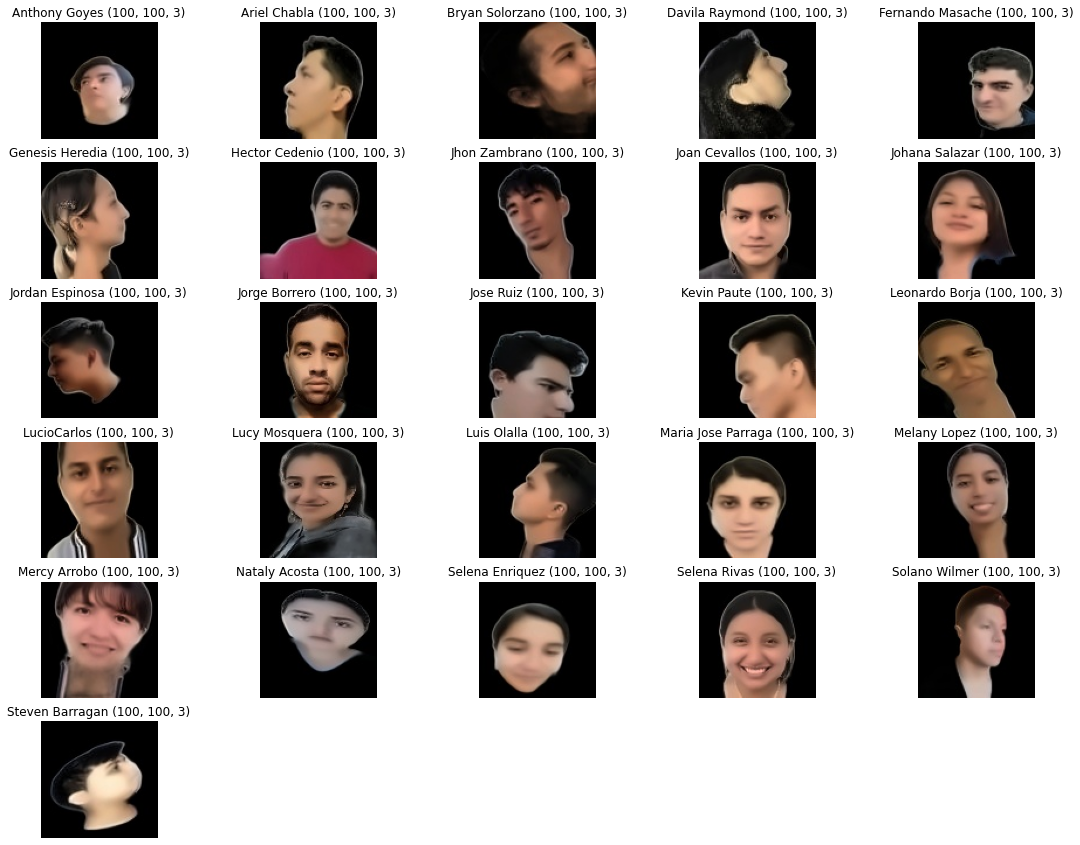

In [285]:
'''Se establece la ruta que contiene a las clases del dataset a usar'''
ruta_imagenes = "./Estudiantes_datos_fondoEliminadoNLM"
'''Se llama al método para cargar las imágenes de la ruta'''
cargarImagenes(ruta_imagenes)

### Después de eliminar datos sucios

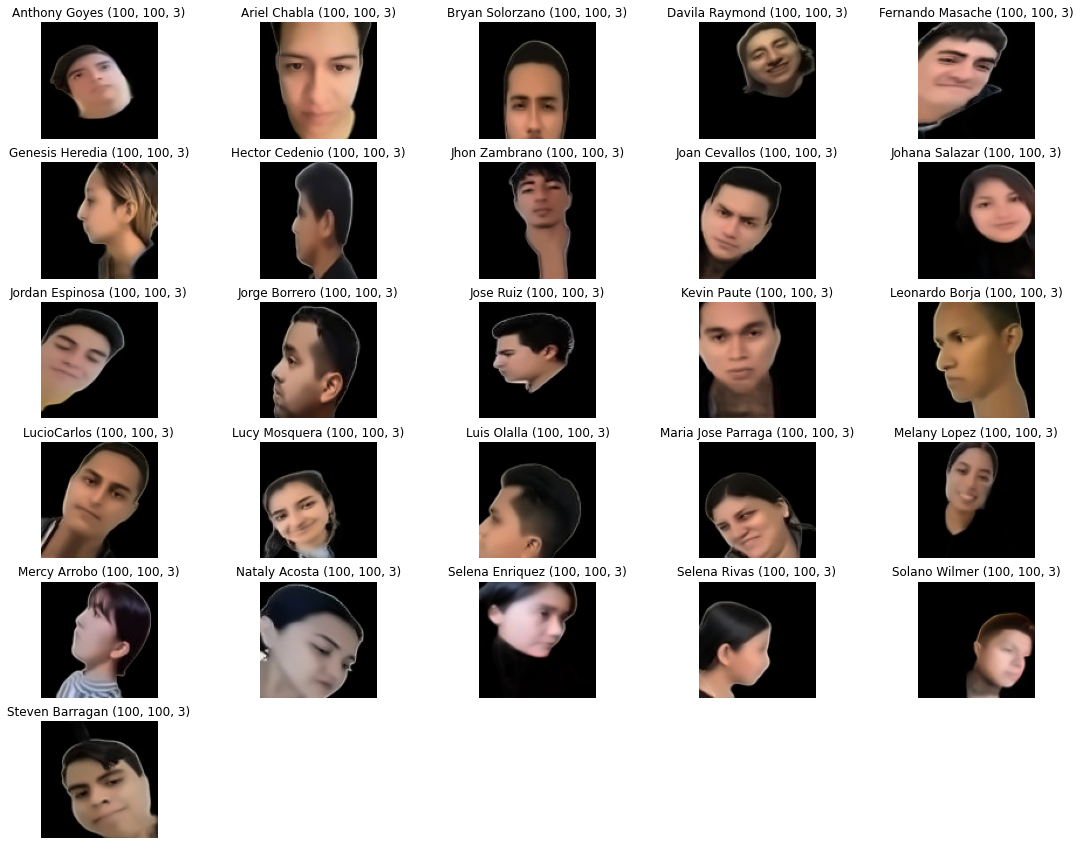

In [287]:
cargarImagenes(ruta_imagenes)